# 5.9

최근접 쌍의 거리

# 1) 문제 정의

2차원 평면 상 n개의 점이 입력으로 주어질 때, 거리가 가장 가까운 한 쌍의 점을 찾는 문제이다.

1. 분할될 때마다 부분문제의 입력이 크기 합이 더 커지는 경우에는 분할 정복이 부적절하다.
2. 취합 과정을 주의해야 한다.
3. 입력을 분할만 한다고 해서 효율적인 알고리즘이 되는 건 아니다.

# 2) 알고리즘 설명

두 점 간의 모든 가능한 조합을 확인하고 최소 거리를 찾는 알고리즘이다. 하지만 큰 규모의 점 집합은 비효율적이다.

# 3) 손으로 푼 예제

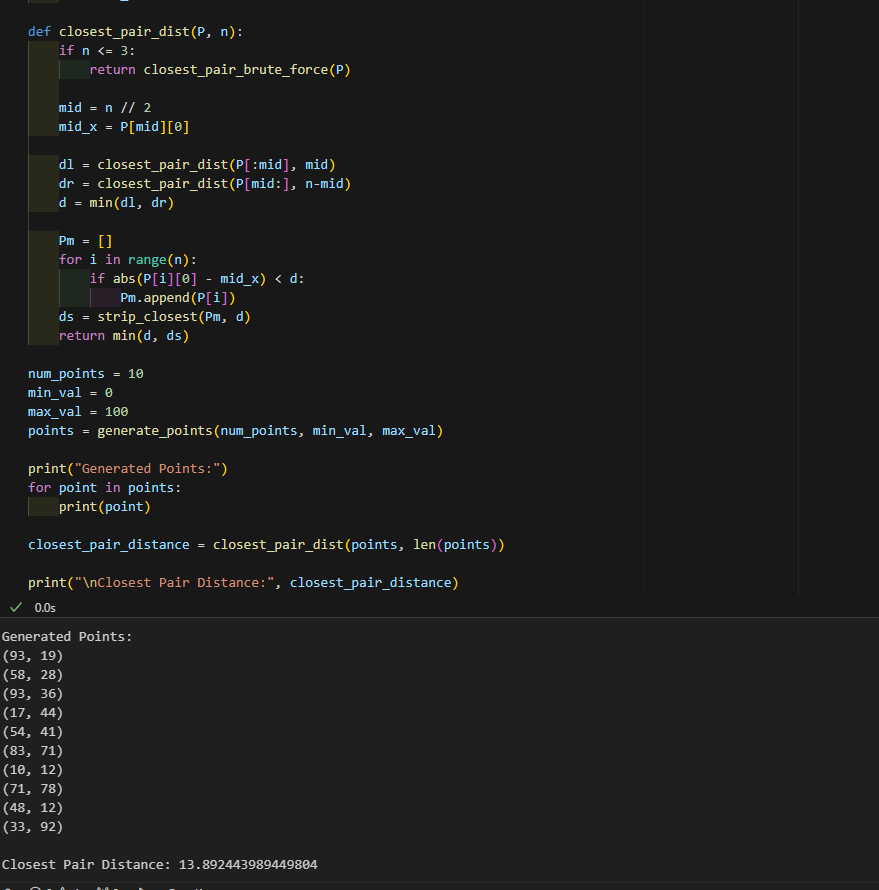

# 4) 코드개요

1. 점들을 x좌표를 기준으로 정렬한다.
2. 점들을 반으로 나누어 좌측 부분과 우측 부분으로 나눈다.
3. 좌측 부분과 우측 부분에서 각각 최급접 쌍을 찾는다.
4. 두 부분에서 찾은 최근접 쌍 중에서 거리가 더 짧은 것을 선택한다.
5. 두 부분에서 찾은 최근접 쌍의 거리와 중간 부분에서 찾을 수 있는 최근접 쌍의 거리 중에서 가장 짧은 것을 선택한다.

# 5) 알고리즘 코드

In [1]:
def closest_pair_dist(P, n):
    if n <= 3:
        return closest_pair(P)
    
    mid = n // 2
    mid_x = P[mid][0]

    dl = closest_pair_dist(P[:mid], mid)
    dr = closest_pair_dist(P[mid:], n-mid)
    d = min(dl, dr)

    Pm = []
    for i in range(n):
        if abs(P[i][0] - mid_x) < d:
            Pm.append(P[i])
    ds = strip_closest(Pm, d)
    return ds

# 6) 테스트 코드

In [3]:
import random

def generate_points(n, min_val, max_val):
    return [(random.randint(min_val, max_val), random.randint(min_val, max_val)) for _ in range(n)]

def distance(point1, point2):
    return ((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2) ** 0.5

def closest_pair_brute_force(points):
    min_dist = float('inf')
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            min_dist = min(min_dist, distance(points[i], points[j]))
    return min_dist

def strip_closest(P, d):
    n = len(P)
    d_min = d
    P.sort(key=lambda point: point[1]) 

    for i in range(n):
        j = i + 1

        while j < n and (P[j][1] - P[i][1]) < d_min:
            dij = distance(P[i], P[j])
            if dij < d_min:
                d_min = dij
            j += 1
    return d_min

def closest_pair_dist(P, n):
    if n <= 3:
        return closest_pair_brute_force(P)
    
    mid = n // 2
    mid_x = P[mid][0]

    dl = closest_pair_dist(P[:mid], mid)
    dr = closest_pair_dist(P[mid:], n-mid)
    d = min(dl, dr)

    Pm = []
    for i in range(n):
        if abs(P[i][0] - mid_x) < d:
            Pm.append(P[i])
    ds = strip_closest(Pm, d)
    return min(d, ds)

num_points = 10
min_val = 0
max_val = 100
points = generate_points(num_points, min_val, max_val)

print("Generated Points:")
for point in points:
    print(point)

closest_pair_distance = closest_pair_dist(points, len(points))

print("\nClosest Pair Distance:", closest_pair_distance)

Generated Points:
(93, 19)
(58, 28)
(93, 36)
(17, 44)
(54, 41)
(83, 71)
(10, 12)
(71, 78)
(48, 12)
(33, 92)

Closest Pair Distance: 13.892443989449804


# 7) 수행 결과

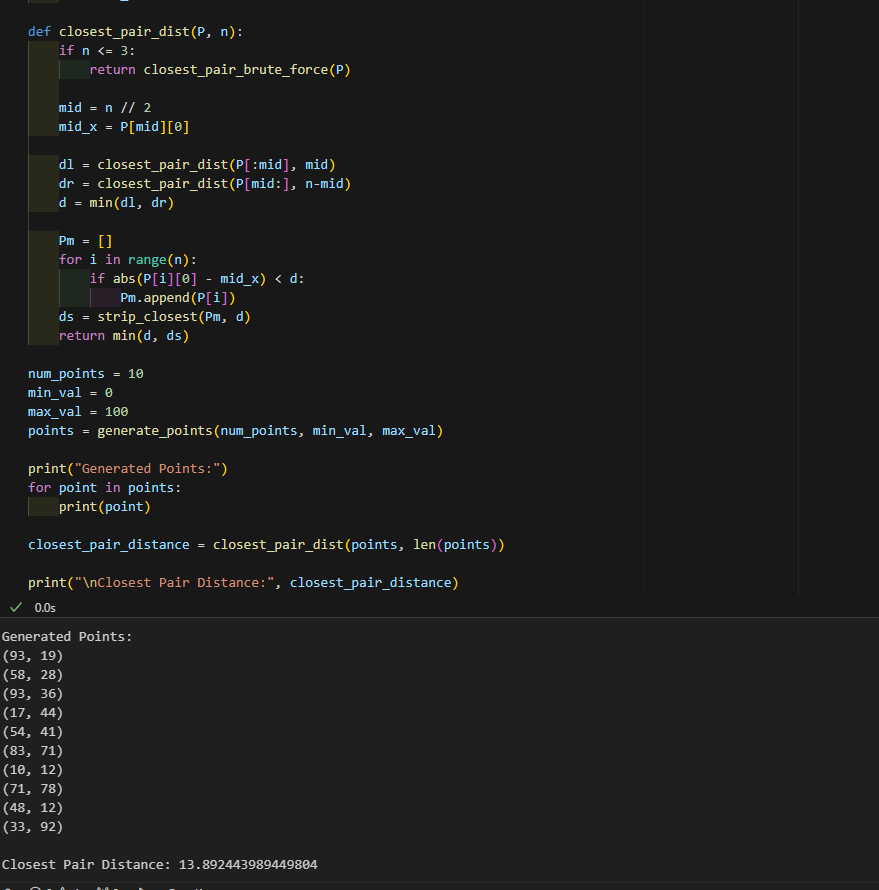

# 8) 복잡도 분석

각 층의 수행 시간 O(nlogn) 층 수 (logn) 를 공합 값은 O(nlog2n)이 된다.

# 9) 조별 협력 내용 (상호지도)